### Data Loading and Cleaning

In [9]:
'''
#Используем если надо загрузить из локального csv файла

train_data = 'train.csv'
test_data = 'test.csv'

with open(train_data) as train:
    train_df = pd.read_csv(train)
    
with open(test_data) as test:
    test_df = pd.read_csv(test)
'''
#Используем если данные лежат в postgres БД

config = configparser.ConfigParser()
config.read('config.ini')
conn_string = config.get('DATABASE', 'connection_url')

# Создаем строку подключения

engine = create_engine(conn_string)
table = 'house_prices_train'

# Выполняем SQL-запрос и загружаем данные в DataFrame
query = f"SELECT * FROM {table}"

train_df = pd.read_sql(query, engine)

# Печатаем первые строки для проверки
train_df.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dt
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,2024-10-09 11:28:36
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,2024-10-09 11:28:36
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,2024-10-09 11:28:36
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,2024-10-09 11:28:36
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,2024-10-09 11:28:36


In [12]:
train_df.shape

(1460, 82)

In [10]:
train_df_copy = train_df.copy(deep=True)

In [11]:
train_df_copy.shape

(1460, 82)

In [16]:
#Проверка на дубли

#train_df_copy.duplicated().sum()

train_df_copy[train_df_copy.duplicated()]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dt


In [17]:
#Удаляем дубли

train_df_copy.drop_duplicates(inplace = True)

In [18]:
#Описание данных 

train_df_copy.describe().loc[['min', 'max', 'mean', 'std']].round(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0
mean,730.50,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5


### EDA

In [19]:
#Функции для создания таблицы по пропускам и визуализации фичей с пропусками
'''
data_frame - Датафрейм который передаем в функцию на проверку
missings_percent - % пустых значений который хотим проверить например missings_percent>0 покажет все колонки где есть пропуски

'''
def missings(data_frame,missings_percent):

    total = data_frame.isnull().sum().sort_values(ascending=False)
    percent = (data_frame.isnull().sum()/train_df.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data[(missing_data['Percent']>missings_percent)]
    
    return missing_data
    
def missings_bar_vizualisation(data_frame,missings_percent):
    
    try:

        total = data_frame.isnull().sum().sort_values(ascending=False)
        percent = (data_frame.isnull().sum()/train_df.isnull().count()*100).sort_values(ascending=False)
        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        missing_data = missing_data[(missing_data['Percent']>missings_percent)]
    
        #plt.rcParams["figure.figsize"] = (10,5)
        sns.barplot(x=missing_data.index,y=missing_data['Percent'],data = missing_data)
        plt.xticks(rotation=70)
        plt.show()
    
    except ValueError:
        
        print('No missings')

In [20]:
missings(train_df_copy,0)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageCond,81,5.547945


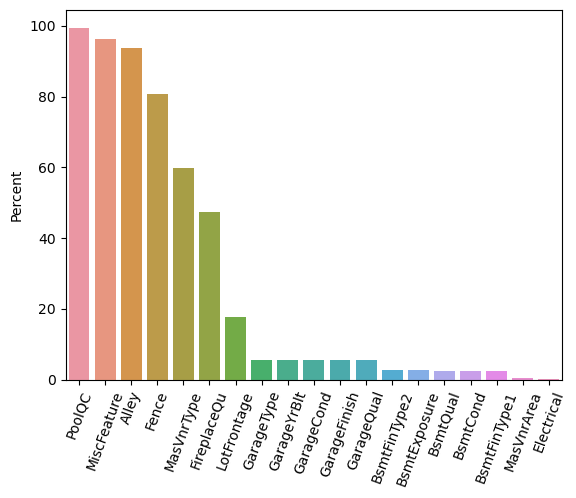

In [21]:
missings_bar_vizualisation(train_df_copy,0)

In [22]:
#Дропним у кого больше percent пропусков

percent = 60

#Записываем таблицу с % пропусков

missings_table = missings(train_df_copy,percent)

#Получаем список колонок на удаление

for_drop = missings_table.index.to_list()

#Удаляем колонки
after_drops = train_df_copy.drop(columns = for_drop)


In [23]:
for_drop

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [25]:
#Проверяем что удалились колонки с процентом пропусков больше чем percent

percent = 60
missings_bar_vizualisation(after_drops,percent)

No missings


In [26]:
after_drops.shape

(1460, 78)

In [27]:
#Смотрим на оставшуюся таблицу

after_drops.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dt
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,2024-10-09 11:28:36
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,2024-10-09 11:28:36
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,2024-10-09 11:28:36
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,2024-10-09 11:28:36
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,2024-10-09 11:28:36


In [28]:
#Дропним поле Id за ненадобностью

after_drops.drop(columns = 'Id',inplace=True)

In [29]:
#Список полей у которых есть пропуски

list_of_missing_columns = missings(after_drops,0).index.to_list()


In [30]:
list_of_missing_columns

['MasVnrType',
 'FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtQual',
 'BsmtCond',
 'MasVnrArea',
 'Electrical']

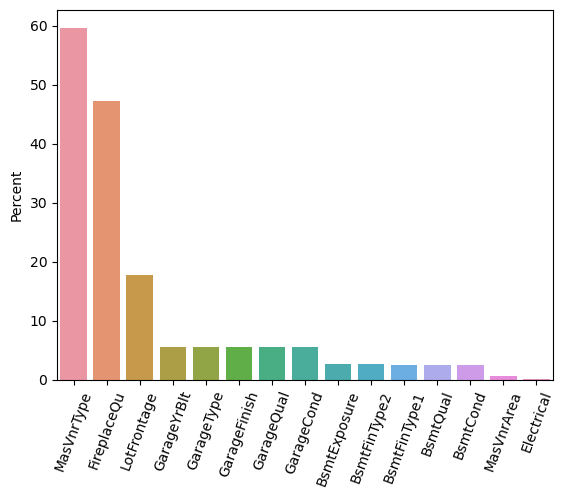

In [31]:
missings_bar_vizualisation(after_drops,0)

In [32]:
#Типы данных по оставшемся колонкам

after_drops.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


# EDA

In [ ]:
#Заполним пропуски по всем переменным. Для числовых ставим median() для категориальных "None"
#Стратегий заполнения пропусков может быть много более продвинутая это заполнение относительно целевой переменной

#В реальных данных пропущенными могут быть абсолютно любые поля поэтому заполнение производим по всем полям которые есть в датафрейме 
#после удаления ненужных колонок даже если там нет пропусков

#Float и int можно объединить в один if

unique_types = after_drops.dtypes.unique()

#Для простоты заполним медианным значением

for typ in unique_types:
    
    if typ == 'object':
        
        object_columns = after_drops.select_dtypes(include = ['object']).columns.to_list()
        after_drops[object_columns] = after_drops[object_columns].fillna('None')
    
    elif typ == 'float64':
        
        float_columns = after_drops.select_dtypes(include = ['float64']).columns.to_list()
        after_drops[float_columns] = after_drops[float_columns].fillna(after_drops[float_columns].median())

    
    elif typ == 'int64':
        
        int_columns = after_drops.select_dtypes(include = ['int64']).columns.to_list()
        after_drops[int_columns] = after_drops[int_columns].fillna(after_drops[int_columns].median())

In [ ]:
#Артефакты по заполнению пропусков для числовых переменных

after_drops[float_columns].median()

In [ ]:
after_drops[int_columns].median()

In [ ]:
int_float_artefacts = pd.concat([after_drops[float_columns].median(),after_drops[int_columns].median()])

In [ ]:
int_float_artefacts

In [ ]:
#Еще раз проверяем что все заполнилось 

missings_bar_vizualisation(after_drops,0)

In [ ]:
# Функция для визуализации hist plot ,boxplot,countplot и Scatter plot для всех признаков

def overall_viz(data_frame,cols,cell):

    heart_CAT = data_frame.columns.to_list()

#  Categorical Data

    b = cols  # number of columns
    a = math.ceil(len(heart_CAT)/b)*3  # number of rows
    c = 1  # initialize plot counter

    fig = plt.figure(figsize = (20,200))



    for i in heart_CAT:
        
        if data_frame[i].dtype in ['float64','int64']:
            
            plt.subplot(a, b, c)
            plt.xlabel(i)
            sns.boxplot(data = data_frame, x = i)
            c = c + 1
    
            plt.subplot(a, b, c)
            plt.xlabel(i)
            sns.histplot(data = data_frame, x = i)
            c = c + 1
            
            plt.subplot(a, b, c)
            plt.xlabel(i)
            sns.scatterplot(data=data_frame, x=cell, y=i)
            c = c + 1
        
        elif data_frame[i].dtype in ['object']:
            
            plt.subplot(a, b, c)
            plt.xlabel(i)
            sns.countplot(data = data_frame, x = i)
            c = c + 1
            
            plt.subplot(a, b, c)
            plt.xlabel(i)
            sns.histplot(data = data_frame, x = i)
            c = c + 1
            
            plt.subplot(a, b, c)
            plt.xlabel(i)
            sns.scatterplot(data=data_frame, x=cell, y=i)
            c = c + 1
        
        
#QQ Plot    
#    plt.subplot(a, b, c)
#    plt.xlabel(i)
#    pplot(data = after_drops_numeric,x = i,kind='qq')
#    c = c + 1

#fig.tight_layout(h_pad=2,w_pad=2)
    
    plt.show()

In [ ]:
overall_viz(after_drops,3,"SalePrice")

In [ ]:
#Сохраним список категориальных признаков

categorical_features = after_drops.select_dtypes(include=['object']).columns.to_list()

In [ ]:
categorical_features

In [1]:
#Преобразование категориальных признаков

#Lable encoding


cols = after_drops.select_dtypes(include = ['object']).columns.to_list()

# process columns, apply LabelEncoder to categorical features

transform_df = pd.DataFrame()

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(after_drops[c].values)) 
    after_drops[c] = lbl.transform(list(after_drops[c].values))

#Создадим словарь для последующего декодирования
    
    keys = lbl.classes_
    values = lbl.transform(lbl.classes_)
    transform = pd.DataFrame(zip(keys, values),columns = ['name','transform_value'])
    transform['feature_name'] = c
    transform_df = pd.concat([transform,transform_df])

# shape        
#print('Shape all_data: {}'.format(after_drops.shape),)



SyntaxError: invalid syntax (3276747912.py, line 28)

In [ ]:
#Можно увидеть, что None декодируется например 4, хотя возможно что 0 было бы более подходящее значение
#Артефакт

transform_df

In [ ]:
#Проверим что все преобразовалось

after_drops.select_dtypes(include = ['object']).head(2)

In [ ]:
after_drops.head(5)

In [ ]:
overall_viz(after_drops,3,"SalePrice")

### К текущему этапу наш датафрейм очищен от больших пропусков и преобразованны категориальные переменные
#### Преобразование категориальных переменных можно было бы и опустить если мы будем использовать catboost, которые принимает на вход категориальные переменные.
#### Так же можно было бы детальнее поработать с заполнением пропусков для категориальных переменных а именно заполнить их не None а более умным способом.
#### Обратное декодирование было сделано с целью тренеровки оно так же скорее всего не понадобится в дальнейшем

#### Хранение различных артефактов

<a id='2'></a>

[Вопросы](#0)

In [ ]:
#Корреляция относительно целевой переменной

plt.figure(figsize=(14,8))
after_drops.corr()['SalePrice'].sort_values(ascending=False).plot(kind='bar')

### Model train an selection

<a id='4'></a>

[Вопросы](#0)

In [ ]:
#Разделим набор данных и целевую переменную

X_train = after_drops.loc[:,:'SaleCondition']
Y_train = after_drops['SalePrice']

#Нормализация данных

#В дальнейшем мы не будем использовать нормализацию но пусть будет тут
scaler = MinMaxScaler().fit(X_train)
x_minmax = scaler.transform(X_train)


In [ ]:
# Возьмем сразу несколько моделей и сделаем поиск по сетке
#Параметры по моделям Регрессоров(Надо засунуть в yaml)

catboost_params = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 6,10]
         }

lasso_params = {
    'alpha':[0.01,0.1,0,10,100,200,300,500]
        }

ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

xgb_params ={"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4]
            }

DecisionTreeRegressor_params = [
    {'max_depth': [3, 5, 10], 
     'max_features': [3, 4, 5]},
    {'random_state': [0, 1, 2, 3, 4], 
     'min_samples_split': [2, 3, 4]}    
]

ElasticNet_params = [
        {'alpha': [.0004, .0005], 'l1_ratio': [.5, .8, 1]}
]

#Словарь модель:параметры

models_dict = {'models':
               [CatBoostRegressor(),
                Lasso(),
                XGBRegressor(),
                Ridge(),
                DecisionTreeRegressor(),
                ElasticNet()
               ],
               
               'params':[catboost_params,
                         lasso_params,
                         xgb_params,
                         ridge_params,
                         DecisionTreeRegressor_params,
                         ElasticNet_params
                        ]
              }

error = 'r2'


In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

####Блок по моделям

def models_cyckle(X_train,Y_train,folds,error):

    models_report = pd.DataFrame()
    
    for i in range(len(models_dict['models'])):
        
        
          
        grid_search = GridSearchCV(models_dict['models'][i], param_grid=models_dict['params'][i], cv=folds, scoring=error, n_jobs=-1)
        grid_search.fit(X_train, Y_train)
    
        best_model = pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(1)
        best_model['model_name'] = str(models_dict['models'][i])
        models_report = pd.concat([models_report,best_model])
    
    return models_report

In [ ]:
report = models_cyckle(X_train,Y_train,folds,error)

In [ ]:
report.loc[:,:'model_name'].sort_values(by='mean_test_score',ascending = False)

In [ ]:
#Получаем что лучше всего с задачей справился XGBRegressor

In [ ]:
#Теперь самое интересное.
#Надо взять наш тестовый датасет и произвести над ним все манипуляции, которые производили с train.
#Заполнить пропуски,закодировать категориальные переменные

#### Артефакты к данному моменту, которые нужно будет потом преобразовать в python код
##### Список полей которые мы использовали при обучении(мы не отбрасывали ни какие признаки на основании аналитического исследования, а отбрасывали только пустые)
##### Заполнение пропусков
##### Кодирование категориальных переменных

In [ ]:
#Выбираем XGBRegressor с такими параметрами

#{'colsample_bytree': 0.3, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1}

xgb_params ={"learning_rate": 0.1,
                        "max_depth": 4,
                        "min_child_weight":1,
                        "gamma":0.1,
                        "colsample_bytree":0.3
            }


In [ ]:
#Передаем в модель наши параметры

model = XGBRegressor(**xgb_params).fit(X_train, Y_train)


In [ ]:
# Сохраним нашу модель
import pickle

with open("XGBRegressor.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
# Пишем класс для преобразования пропусков которы потом преобразуем в python файл

передаем значения или датафрейм в функцию
оставляем только нужные колонки которые использовали при обучении

In [ ]:
used_columns = after_drops.loc[:,:'SaleCondition'].columns.to_list()

In [ ]:
test_df[used_columns].head(5)

In [ ]:
def Imputer(dataframe,used_columns):

    #Оставляем поля которые использовали при обучении
    
    used_df = dataframe[used_columns]

    #Заменяем пропуски с помощью артефактов полученных на тренеровочном датасете

    unique_types = used_df.dtypes.unique()

#Для простоты заполним медианным значением

    for typ in unique_types:
    
        if typ == 'object':
        
            object_columns = used_df.select_dtypes(include = ['object']).columns.to_list()
            used_df[object_columns] = used_df[object_columns].fillna('None')

        elif typ != 'object':
            
            non_object_columns = used_df.select_dtypes(exclude = ['object']).columns.to_list()
            
            for i in non_object_columns:
                
                used_df[i] = used_df[i].map(transform_df[['name','transform_value']][transform_df['feature_name'] == i].set_index('name').to_dict()['transform_value'])
            
            used_df.map(int_float_artefacts)
    
        

    return used_df

In [ ]:
int_float_artefacts.index

In [ ]:
int_float_artefacts

In [ ]:
Imputer(train_df,used_columns)

In [ ]:
#Артефакты по заполнению пропусков медианным значением
int_float_artefacts

In [ ]:
#Преобразуем пропуски



In [ ]:
unique_types = after_drops.dtypes.unique()

#Для простоты заполним медианным значением

for typ in unique_types:
    
    if typ == 'object':
        
        object_columns = after_drops.select_dtypes(include = ['object']).columns.to_list()
        after_drops[object_columns] = after_drops[object_columns].fillna('None')
    
    elif typ == 'float64':
        
        float_columns = after_drops.select_dtypes(include = ['float64']).columns.to_list()
        after_drops[float_columns] = after_drops[float_columns].fillna(after_drops[float_columns].median())

    
    elif typ == 'int64':
        
        int_columns = after_drops.select_dtypes(include = ['int64']).columns.to_list()
        after_drops[int_columns] = after_drops[int_columns].fillna(after_drops[int_columns].median())

In [ ]:
#Берем только колонки на которых обучались

test_df_2 = test_df[X_train.columns]

In [ ]:
#Наши артефакты

#Перевод категориальных переменных в числовые из LabelEncoder
transform_df 

#Заполнение пропусков в числовых переменных

after_drops[float_columns].median()

In [ ]:
#Список полей у которых есть пропуски

list_of_missing_columns_2 = missings(test_df_2,0).index.to_list()

In [ ]:
list_of_missing_columns_2

In [ ]:
#Заполним пропуски по всем переменным. Для числовых ставим median() для категориальных "None"

unique_types = test_df_2[list_of_missing_columns_2].dtypes.unique()


for typ in unique_types:
    
    if typ == 'object':
        
        object_columns = test_df_2[list_of_missing_columns_2].select_dtypes(include = ['object']).columns.to_list()
        test_df_2[object_columns] = test_df_2[object_columns].fillna('None')
    
    elif typ == 'float64':
        
        float_columns = test_df_2[list_of_missing_columns_2].select_dtypes(include = ['float64']).columns.to_list()
        test_df_2[float_columns] = test_df_2[float_columns].fillna(after_drops[float_columns].median())

    
    elif typ == 'int64':
        
        int_columns = test_df_2[list_of_missing_columns_2].select_dtypes(include = ['int64']).columns.to_list()
        test_df_2[int_columns] = test_df_2[int_columns].fillna(after_drops[int_columns].median())

In [ ]:
#Еще раз проверяем что все заполнилось 

missings_bar_vizualisation(test_df_2,0)

In [ ]:
test_df_2.head(5)

In [ ]:
#Декодирование категориальных переменных
transform_df

In [ ]:
#Само декодирование

obj_col = test_df_2.select_dtypes('object').columns.to_list()
for i in obj_col:
    test_df_2[i] = test_df_2[i].map(transform_df[['name','transform_value']][transform_df['feature_name'] == i].set_index('name').to_dict()['transform_value'])



In [ ]:
test_df_2.shape

In [ ]:
test_df_2[obj_col]

In [ ]:
after_drops.shape

In [ ]:
#Делаем предсказание

prediction = model.predict(test_df_2)

In [ ]:
prediction

In [ ]:
#Submission

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_df['Id']
sub['SalePrice'] = prediction
sub.to_csv('submission.csv',index=False)

In [ ]:
sub

#### Выводы:

- 1.Не поработал с аномалиями
- 2.Сложная система декодирования - но я хотел попробовать ее сделать.
- 3.Нету ФичаИнжениринга
- 4.Надо упростить код - убрать функции всякие чтоб стало прозрачнее
- 5.Заполнение пропусков - можно использовать что то более интересное KNNImputer например
- 6.Декодирование - можно посмотреть другие подходы
- 7.Параметры моделей можно убрать в Yaml или ini файл
- 8.Для большого числа экспериментов когда хочется попробовать разные импутеры и кодировщики надо использовать какой-то автоматизированный подход Airflow,MLFlow,Hydra,Piplines
- 9.Вообще не читал описание данных.
- 10.Разобраться с метриками
- 11.Для CatBoost не обязательно делать кодирование
- 12.Не использовал нормализацию
- 13.Не проверил как прошло декодирование
- 14.Попробовать AutoML
- 15.Попробовать подбор параметров модели через Optuna
- 16.Использовать готовые фреймворки для построения графиков
- 17.PSI для проверки стабильности фич во времени


- 15.Попробовать подбор параметров модели через Optuna

In [ ]:
study = optuna.create_study(study_name="my_first_study", direction="maximize")

In [ ]:
xgb_params ={"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4]
            }

In [ ]:
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

def objective(trial):
    # предложение гиперпараметров
    alpha = trial.suggest_float('alpha', 1e-10, 1.0, log=True)

    # Модель
    model = Ridge(alpha=alpha)

    # предсказание и вычисление MSE
    model.fit(X_train, Y_train)
    error = cross_val_score(model, X_train, Y_train, n_jobs=-1, cv=folds,scoring = 'r2')
    #mse = mean_squared_error(y_valid, y_pred)
    
    return error

study = optuna.create_study(directions=['maximize'])
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("Error":)
print("  Values: ", trial.values)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

In [ ]:
models_dict = {'models':
               [
                Ridge()
               ],
               
               'params':[
                         ridge_params
                         
                        ]
              }

error = 'r2'
def models_cyckle(X_train,Y_train,folds,error):

    models_report = pd.DataFrame()
    
    for i in range(len(models_dict['models'])):
        
        
          
        grid_search = GridSearchCV(models_dict['models'][i], param_grid=models_dict['params'][i], cv=folds, scoring=error, n_jobs=-1)
        grid_search.fit(X_train, Y_train)
    
        best_model = pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(1)
        best_model['model_name'] = str(models_dict['models'][i])
        models_report = pd.concat([models_report,best_model])
    
    return models_report

In [ ]:
alpha = trial.suggest_float('alpha', 1e-10, 1.0, log=True)


In [ ]:
alpha